In [1]:
cz1217 = ['https://opendata.arcgis.com/datasets/9cbe8553d4e2456ab6c140d83c7e83e0_15.csv', 'https://opendata.arcgis.com/datasets/3d49e06d51984fa2b68f21eed21eba1f_14.csv', 'https://opendata.arcgis.com/datasets/54b57e15f6944af8b413a5e4f88b070c_13.csv', 'https://opendata.arcgis.com/datasets/b3283607f9b74457aff420081eec3190_29.csv', 'https://opendata.arcgis.com/datasets/2dc1a7dbb705471eb38af39acfa16238_28.csv', 'https://opendata.arcgis.com/datasets/585c8c3ef58c4f1ab1ddf1c759b3a8bd_39.csv']

In [2]:
! conda install geopandas -qy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import os




Package plan for installation in environment /opt/conda:

The following NEW packages will be INSTALLED:

    click-plugins:   1.0.3-py36_0      conda-forge
    cligj:           0.4.0-py36_0      conda-forge
    curl:            7.54.1-0          conda-forge
    descartes:       1.1.0-py36_0      conda-forge
    fiona:           1.7.10-py36_1     conda-forge
    freexl:          1.0.2-2           conda-forge
    gdal:            2.1.3-np112py36_3 conda-forge
    geopandas:       0.3.0-py36_0      conda-forge
    geos:            3.5.1-1           conda-forge
    giflib:          5.1.4-0           conda-forge
    hdf4:            4.2.12-0          conda-forge
    json-c:          0.12.1-0          conda-forge
    kealib:          1.4.6-3           conda-forge
    krb5:            1.14.2-0          conda-forge
    libdap4:         3.18.3-2          conda-forge
    libnetcdf:       4.4.1-0           conda-forge
    libpq:           9.6.3-0           conda-forge
    libspatialindex: 1.8.5

In [3]:
constr12 = pd.read_csv('https://opendata.arcgis.com/datasets/9cbe8553d4e2456ab6c140d83c7e83e0_15.csv')

In [4]:
constr13 = pd.read_csv('https://opendata.arcgis.com/datasets/3d49e06d51984fa2b68f21eed21eba1f_14.csv')

In [5]:
constr14 = pd.read_csv('https://opendata.arcgis.com/datasets/54b57e15f6944af8b413a5e4f88b070c_13.csv')

In [6]:
constr15 = pd.read_csv('https://opendata.arcgis.com/datasets/b3283607f9b74457aff420081eec3190_29.csv')

In [7]:
constr16 = pd.read_csv('https://opendata.arcgis.com/datasets/2dc1a7dbb705471eb38af39acfa16238_28.csv')

In [8]:
constr17 = pd.read_csv('https://opendata.arcgis.com/datasets/585c8c3ef58c4f1ab1ddf1c759b3a8bd_39.csv')

In [9]:
constr12_17 = pd.concat([constr12, constr13, constr14, constr15, constr16, constr17], axis=0, ignore_index=True)

In [10]:
constr12_17.head().T

,0,1,2,3,4
X,-77.0227,-77.0172,-77.0403,-77.0159,-77.047
Y,38.899,38.8776,38.8985,38.901,38.9049
OBJECTID,28599861,28618034,28619078,28621455,28624658
APPLICATIONDATE,2007-02-07T00:00:00.000Z,2009-02-25T09:13:49.000Z,2009-06-11T11:40:35.000Z,2009-08-14T17:05:20.000Z,2010-07-20T14:41:48.000Z
ISEXCAVATION,F,T,F,F,F
ISFIXTURE,F,F,F,T,T
ISPAVING,F,F,F,F,F
ISLANDSCAPING,F,F,F,F,F
ISPROJECTIONS,F,F,F,F,F
ISPSRENTAL,T,F,T,F,F


In [11]:
constr12_17.shape

(77930, 28)

In [37]:
constr12_17['effective_date'] = pd.to_datetime(constr12_17['EFFECTIVEDATE'])
constr12_17['expire_date'] = pd.to_datetime(constr12_17['EXPIRATIONDATE'])
permit_length = (constr12_17.expire_date - constr12_17.effective_date)
print(permit_length)

index_right
0       120 days 00:00:00
1        98 days 00:00:00
2       365 days 00:00:00
3        18 days 00:00:00
4       364 days 00:00:00
5       364 days 00:00:00
6       364 days 00:00:00
7       364 days 00:00:00
8       307 days 10:26:07
9       365 days 00:00:00
10      364 days 00:00:00
11      364 days 00:00:00
12      179 days 00:00:00
13      364 days 00:00:00
14      364 days 00:00:00
15      364 days 00:00:00
16       80 days 00:00:00
17       80 days 00:00:00
18       80 days 00:00:00
19      365 days 00:00:00
20      364 days 00:00:00
21       67 days 00:00:00
22       28 days 00:00:00
23      179 days 00:00:00
24      306 days 00:00:00
25      364 days 00:00:00
26       77 days 00:00:00
27       61 days 00:00:00
28      306 days 00:00:00
29      364 days 00:00:00
               ...       
77900    60 days 00:00:00
77901    59 days 00:00:00
77902    59 days 00:00:00
77903    59 days 00:00:00
77904    63 days 00:00:00
77905    61 days 00:00:00
77906    59 days 00:00:00


In [45]:
permits = constr12_17[(constr12_17['STATUS']=='Permit Expired') | 
                (constr12_17['STATUS']=='Approved (Pending Payment)') |
                (constr12_17['STATUS']=='Issued') |
                (constr12_17['STATUS']=='Assigned')]
print(permits.STATUS.unique())

['Permit Expired' 'Issued' 'Assigned' 'Approved (Pending Payment)']


In [32]:
! wget https://opendata.arcgis.com/datasets/6969dd63c5cb4d6aa32f15effb8311f3_8.geojson -O census2012

--2017-11-07 18:11:20--  https://opendata.arcgis.com/datasets/6969dd63c5cb4d6aa32f15effb8311f3_8.geojson
Resolving opendata.arcgis.com (opendata.arcgis.com)... 52.54.10.40, 34.235.235.145
Connecting to opendata.arcgis.com (opendata.arcgis.com)|52.54.10.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘census2012’

census2012              [ <=>                ]   1.71M  --.-KB/s    in 0.04s   

2017-11-07 18:11:21 (41.3 MB/s) - ‘census2012’ saved [1794478]



In [46]:
import geopandas as gpd
import os
census = gpd.read_file('census2012')

In [34]:
census.columns

Index(['OBJECTID', 'TRACT', 'GEOID', 'P0010001', 'P0010002', 'P0010003',
       'P0010004', 'P0010005', 'P0010006', 'P0010007', 'P0010008', 'OP000001',
       'OP000002', 'OP000003', 'OP000004', 'P0020002', 'P0020005', 'P0020006',
       'P0020007', 'P0020008', 'P0020009', 'P0020010', 'OP00005', 'OP00006',
       'OP00007', 'OP00008', 'P0030001', 'P0030003', 'P0030004', 'P0030005',
       'P0030006', 'P0030007', 'P0030008', 'OP00009', 'OP00010', 'OP00011',
       'OP00012', 'P0040002', 'P0040005', 'P0040006', 'P0040007', 'P0040008',
       'P0040009', 'P0040010', 'OP000013', 'OP000014', 'OP000015', 'OP000016',
       'H0010001', 'H0010002', 'H0010003', 'ACRES', 'SQ_MILES', 'Shape_Length',
       'Shape_Area', 'FAGI_TOTAL_2010', 'FAGI_MEDIAN_2010', 'FAGI_TOTAL_2013',
       'FAGI_MEDIAN_2013', 'geometry'],
      dtype='object')

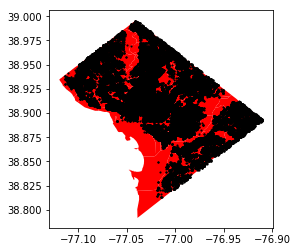

In [47]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(permits.LONGITUDE.apply(float), permits.LATITUDE.apply(float))]
crs = {'init': 'epsg:4326'}
points = gpd.GeoDataFrame(permits, crs=crs, geometry=geometry)
fig, ax = plt.subplots()
census.plot(ax=ax, color='red')
points.plot(ax=ax, color='black', marker='.', markersize=5)
ax.set_aspect('equal')

In [48]:
geo_constr = gpd.sjoin(census, points, how='left', op='intersects')
geo_constr.head()

,OBJECTID_left,TRACT,GEOID,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,...,PERMITTEENAME,OWNERNAME,CONTRACTORNAME,WORKDETAIL,READYFORREVIEWDATE,APPLICANTCOMPANYNAME,LATITUDE,LONGITUDE,effective_date,expire_date
0,1,001001,11001001001,7436,7168,6342,298,17,432,2,...,WASHINGTON GAS LIGHT CO,WASHINGTON GAS LIGHT CO,DCI DCI,PAVING ONLY - MACADAM CUT - 14' WEST OF STORM ...,2014-01-24T09:38:37.000Z,Wash Gas & Light Co.,38.96014,-77.086555,2014-01-24,2014-03-28
0,1,001001,11001001001,7436,7168,6342,298,17,432,2,...,WASHINGTON GAS,WASHINGTON GAS,WASHINGTON GAS,"MACADAM CUT---INSTALL 2 ANODES IN EXISTING 6"" ...",2012-10-11T08:34:16.000Z,Wash Gas & Light Co.,38.96014,-77.086555,2012-10-31,2012-12-29
0,1,001001,11001001001,7436,7168,6342,298,17,432,2,...,WASHINGTON GAS LIGHT CO,WASHINGTON GAS LIGHT CO,DCI DCI,PAVING ONLY - MACADAM CUT - 14' WEST OF STORM ...,2013-10-08T11:51:27.000Z,Wash Gas & Light Co.,38.96014,-77.086555,2013-10-28,2013-12-30
0,1,001001,11001001001,7436,7168,6342,298,17,432,2,...,WASHINGTON GAS LIGHT CO,WASHINGTON GAS LIGHT CO,DCI DCI,PAVING ONLY - MACADAM CUT - 14' WEST OF STORM ...,2014-04-09T14:24:42.000Z,Wash Gas & Light Co.,38.96014,-77.086555,2014-04-09,2014-06-12
0,1,001001,11001001001,7436,7168,6342,298,17,432,2,...,Gregory Calderon,Greg Calderon,Gregory Calderon,Up to 3 Utility Test Holes to identify the dep...,2016-10-25T07:33:37.000Z,NaN,38.96039,-77.085981,2016-12-07,2017-02-07


In [49]:
geo_constr.geometry.head()

0    POLYGON ((-77.07862731061486 38.94604079377298...
0    POLYGON ((-77.07862731061486 38.94604079377298...
0    POLYGON ((-77.07862731061486 38.94604079377298...
0    POLYGON ((-77.07862731061486 38.94604079377298...
0    POLYGON ((-77.07862731061486 38.94604079377298...
Name: geometry, dtype: object

In [73]:
Contruct2HouseRatio = pd.DataFrame(geo_constr.TRACT.value_counts()*100000/geo_constr.H0010002.sum())
print(Contruct2HouseRatio)

           TRACT
010700  1.496751
010600  1.443075
005800  1.058548
000100  0.950318
001001  0.945038
004400  0.925680
007200  0.923920
011100  0.870245
000801  0.816569
000901  0.754095
010100  0.740016
003200  0.732977
010200  0.686341
004801  0.683701
004600  0.654663
000202  0.651144
005500  0.646744
002502  0.633545
010800  0.614187
001100  0.608907
008803  0.594829
008802  0.585149
002900  0.585149
009301  0.584269
003301  0.573710
002400  0.564031
001500  0.561391
003800  0.543793
009400  0.543793
000600  0.540273
...          ...
007409  0.158386
009904  0.152227
007709  0.151347
009906  0.150467
011000  0.135508
002202  0.134628
002001  0.134628
009507  0.127589
009804  0.126709
007404  0.123189
007408  0.113510
009802  0.113510
009801  0.110870
010900  0.110870
009903  0.109111
007708  0.107351
007406  0.103831
009000  0.102951
007605  0.102071
009811  0.097672
009810  0.087992
001803  0.087992
009700  0.084473
009907  0.080953
007403  0.074794
007301  0.066874
006804  0.0633